<img src="https://storage.googleapis.com/ultralytics/logo/logoname1000.png" width="150">

<table align="center"><td>
  <a target="_blank"  href="https://github.com/ultralytics/yolov3/blob/master/tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on github
  </a>
</td><td>
  <a target="_blank"  href="https://colab.sandbox.google.com/github/ultralytics/yolov3/blob/master/tutorial.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td></table>

This notebook contains software developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov3 and https://www.ultralytics.com.







In [2]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.1.0 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


Clone repository and download COCO 2014 dataset (20GB):

In [ ]:
!git clone https://github.com/ultralytics/yolov3  # clone
!bash yolov3/data/get_coco_dataset_gdrive.sh  # copy COCO2014 dataset (19GB)
%cd yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 4781 (delta 35), reused 37 (delta 17), pack-reused 4720
Receiving objects: 100% (4781/4781), 4.74 MiB | 6.95 MiB/s, done.
Resolving deltas: 100% (3254/3254), done.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   2455      0 --:--:-- --:--:-- --:--:--  2440
100 18.8G    0 18.8G    0     0   189M      0 --:--:--  0:01:42 --:--:--  174M
/content/yolov3


Run `detect.py` to perform inference on images in `data/samples` folder:

Namespace(cfg='cfg/yolov3-spp.cfg', conf_thres=0.5, data='data/coco.data', fourcc='mp4v', images='data/samples', img_size=416, nms_thres=0.5, output='output', weights='weights/yolov3-spp.weights')
Using CUDA with Apex device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

image 1/2 data/samples/bus.jpg: 416x320 3 persons, 1 buss, 1 handbags, Done. (0.119s)
image 2/2 data/samples/zidane.jpg: 256x416 2 persons, 1 ties, Done. (0.085s)
Results saved to /content/yolov3/output


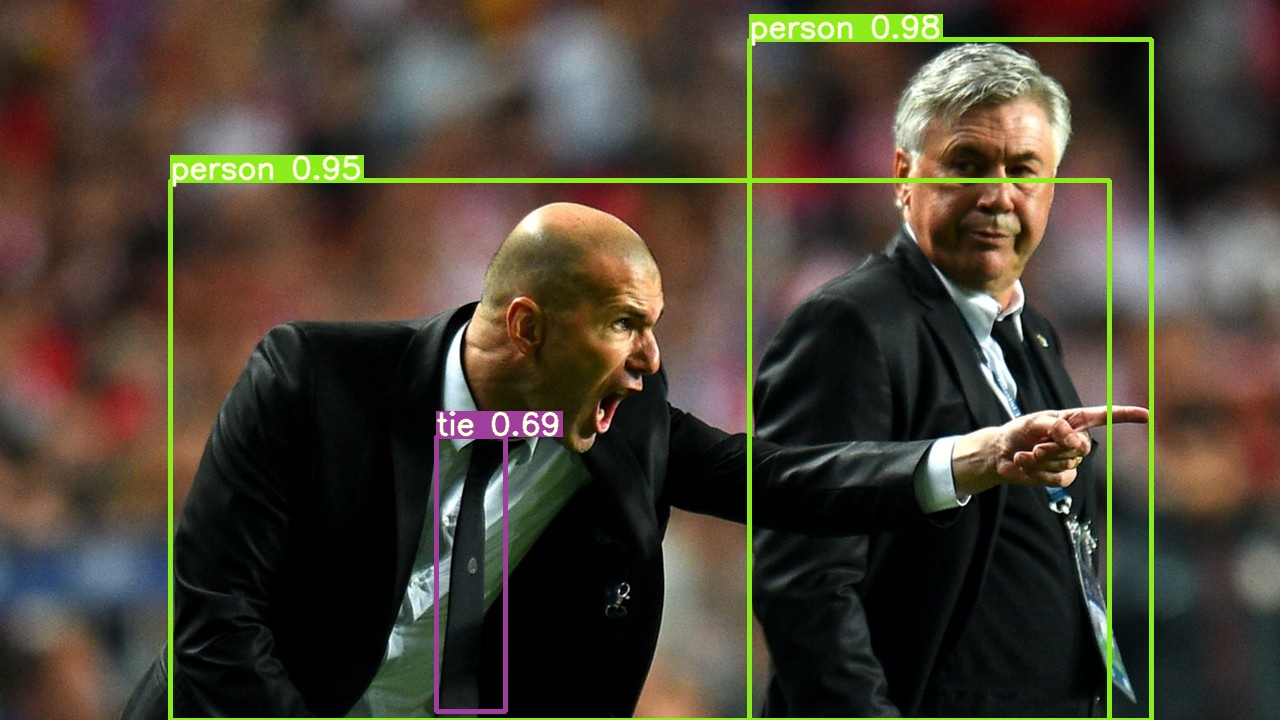

In [ ]:
!python3 detect.py
Image(filename='output/zidane.jpg', width=600)

Run `train.py` to train YOLOv3-SPP starting from a darknet53 backbone:

In [ ]:
!python3 train.py --data data/coco_64img.data --img-size 320 --epochs 3 --nosave

Run `test.py` to evaluate the performance of a trained darknet or PyTorch model:

In [8]:
# !python3 test.py --data data/coco.data --save-json --img-size 416  # 0.565 mAP
!python test.py --data data/coco128.data --img-size 416 --task test --weights weights/yolov3.pt

Namespace(augment=False, batch_size=4, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/coco128.data', device='', img_size=416, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='NVIDIA GeForce GTX 1660 Ti', total_memory=6144MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.29719e+07 parameters, 6.29719e+07 gradients


Traceback (most recent call last):
  File "test.py", line 255, in <module>
    opt.augment)
  File "test.py", line 63, in test
    dataset = LoadImagesAndLabels(path, img_size, batch_size, rect=True, single_cls=opt.single_cls)
  File "f:\code\DeepLearning\ultralytics-YOLOv3-Cluster-NMS\utils\datasets.py", line 262, in __init__
    assert os.path.isfile(path), 'File not found %s. See %s' % (path, help_url)
AssertionError: File not found \mnt\sda\yolact\data\coco\5k.txt. See https://github.com/ultralytics/yolov3/wiki/Train-Custom-Data


Reproduce tutorial training runs and plot training results:

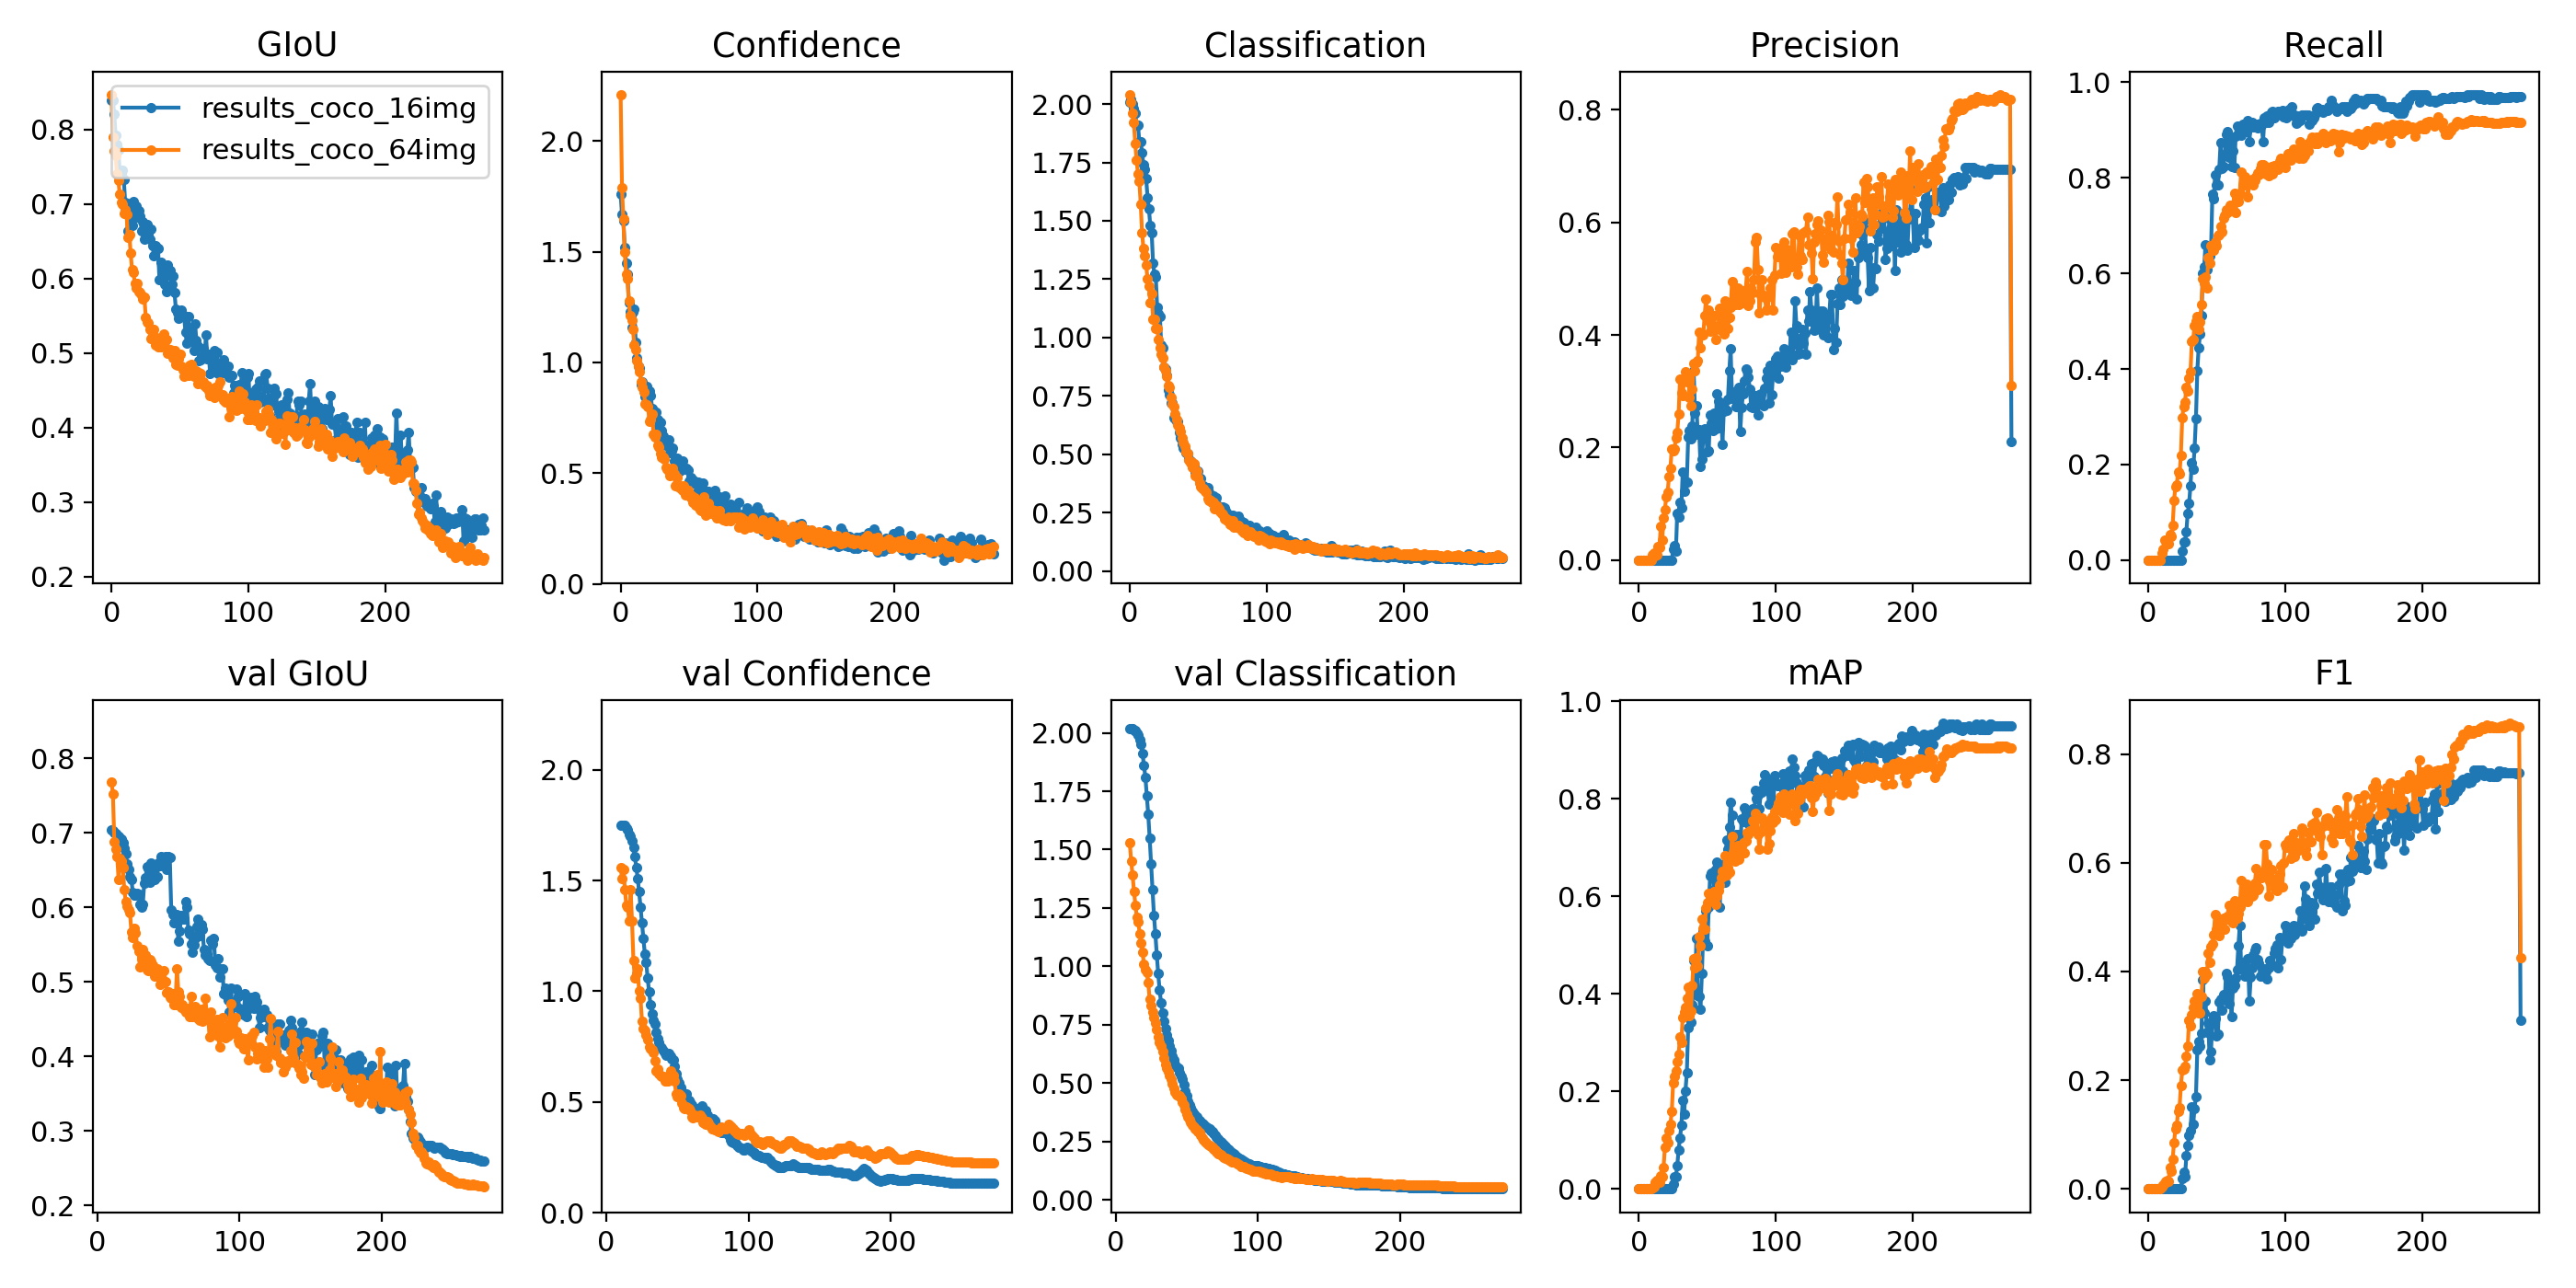

In [8]:
!python3 train.py --data data/coco_16img.data --batch-size 16 --accumulate 1 --nosave && mv results.txt results_coco_16img.txt  # CUSTOM TRAINING EXAMPLE
!python3 train.py --data data/coco_64img.data --batch-size 16 --accumulate 1 --nosave && mv results.txt results_coco_64img.txt 
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image(filename='results.png', width=800)

Extras below

---




In [ ]:
!git pull

In [ ]:
%cd yolov3

In [ ]:
%ls

In [21]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
!python test.py --data data/coco128.data

Namespace(augment=False, batch_size=4, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/coco128.data', device='', img_size=608, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='NVIDIA GeForce GTX 1660 Ti', total_memory=6144MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.29719e+07 parameters, 6.29719e+07 gradients
path:  data/coco128.txt
names:  ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 


Caching labels:   0%|          | 0/1 [00:00<?, ?it/s]
Caching labels (1 found, 0 missing, 0 empty, 0 duplicate, for 1 images): 100%|██████████| 1/1 [00:00<?, ?it/s]
f:\software\anaconda3\envs\yolov3\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1 [00:00<?, ?it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1/1 [00:00<00:00, 15.06it/s]


In [28]:
# Unit Tests
!python detect.py --save-txt --view-img
# detect 2 persons, 1 tie
# !python3 test.py --data data/coco_32img.data  # test mAP = 0.8
# !python3 train.py --data data/coco_32img.data --epochs 3 --nosave  # train 3 epochs

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='output', save_txt=True, source='data/samples', view_img=True, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='NVIDIA GeForce GTX 1660 Ti', total_memory=6144MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/1 data\samples\000000000009.jpg: 384x512 Done. (0.029s)
Results saved to f:\code\DeepLearning\ultralytics-YOLOv3-Cluster-NMS\output
Done. (2.220s)


In [ ]:
# Evolve Hyperparameters
!python3 train.py --data data/coco.data --img-size 320 --epochs 1 --evolve